In [108]:
!pip install country_converter
!pip install wordcloud

In [109]:
!kaggle datasets download -d lainguyn123/data-science-salary-landscape
# Import dependencies
import zipfile
import os
import pandas as pd
import numpy as np
import country_converter as coco
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
import nltk

%matplotlib inline
# Define file paths
zip_file = 'data-science-salary-landscape.zip'
output_dir = './data'

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

# Check the extracted files
os.listdir(output_dir)


Dataset URL: https://www.kaggle.com/datasets/lainguyn123/data-science-salary-landscape
License(s): CC0-1.0
data-science-salary-landscape.zip: Skipping, found more recently modified local copy (use --force to force download)


['salaries.csv', 'salaries_cleaned.csv']

In [110]:
# Load the CSV file (replace with the correct file name)
data_path = './data/salaries.csv'  # adjust this to the correct file name
df = pd.read_csv(data_path)

# Check the first few rows
df.head()


work_year experience_level employment_type             job_title  salary  \
0       2020               EN              FT   Azure Data Engineer  100000   
1       2020               EN              CT    Staff Data Analyst   60000   
2       2020               SE              FT  Staff Data Scientist  164000   
3       2020               EN              FT          Data Analyst   42000   
4       2020               EX              FT        Data Scientist  300000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         100000                 MU             0   
1             CAD          44753                 CA            50   
2             USD         164000                 US            50   
3             EUR          47899                 DE             0   
4             USD         300000                 US           100   

  company_location company_size  
0               MU            S  
1               CA            L  
2               US            M  
3               DE            L  
4               US            L

In [111]:
# Drop salary and salary_currency
df.drop(df[['salary','salary_currency']], axis = 1, inplace = True)
df.head()

work_year experience_level employment_type             job_title  \
0       2020               EN              FT   Azure Data Engineer   
1       2020               EN              CT    Staff Data Analyst   
2       2020               SE              FT  Staff Data Scientist   
3       2020               EN              FT          Data Analyst   
4       2020               EX              FT        Data Scientist   

   salary_in_usd employee_residence  remote_ratio company_location  \
0         100000                 MU             0               MU   
1          44753                 CA            50               CA   
2         164000                 US            50               US   
3          47899                 DE             0               DE   
4         300000                 US           100               US   

  company_size  
0            S  
1            L  
2            M  
3            L  
4            L

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37234 entries, 0 to 37233
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           37234 non-null  int64 
 1   experience_level    37234 non-null  object
 2   employment_type     37234 non-null  object
 3   job_title           37234 non-null  object
 4   salary_in_usd       37234 non-null  int64 
 5   employee_residence  37234 non-null  object
 6   remote_ratio        37234 non-null  int64 
 7   company_location    37234 non-null  object
 8   company_size        37234 non-null  object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [113]:
df.count()

work_year             37234
experience_level      37234
employment_type       37234
job_title             37234
salary_in_usd         37234
employee_residence    37234
remote_ratio          37234
company_location      37234
company_size          37234
dtype: int64

In [114]:
df["work_year"].unique()

array([2020, 2021, 2022, 2023, 2024], dtype=int64)

In [115]:
df.shape

(37234, 9)

In [116]:
# Get basic statistics of numeric columns
df.describe()

work_year  salary_in_usd  remote_ratio
count  37234.000000   37234.000000  37234.000000
mean    2023.656443  160540.603105     23.197884
std        0.611469   72679.876280     42.005217
min     2020.000000   15000.000000      0.000000
25%     2023.000000  110000.000000      0.000000
50%     2024.000000  150000.000000      0.000000
75%     2024.000000  200000.000000      0.000000
max     2024.000000  800000.000000    100.000000

In [117]:
# Check for any missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# Exploratory Data Analysis (EDA)

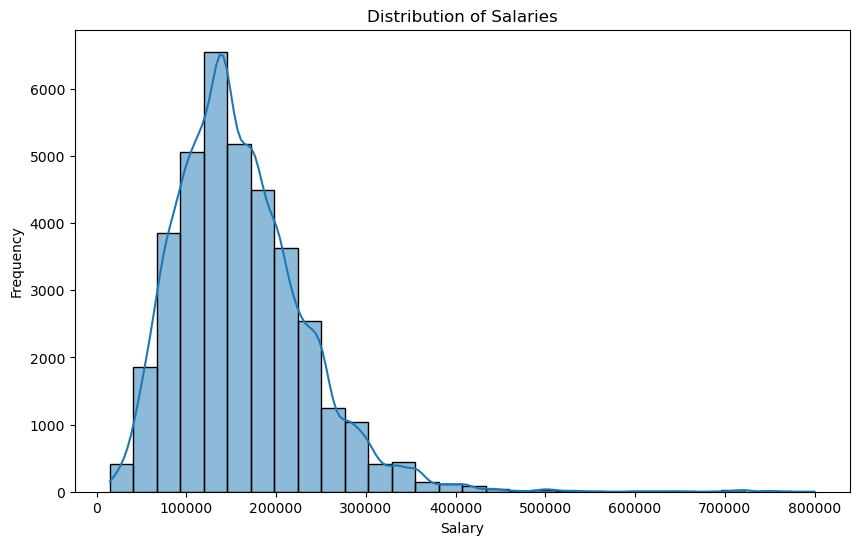

In [118]:
# Distribution of Salaries
plt.figure(figsize=(10,6))
sns.histplot(df['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


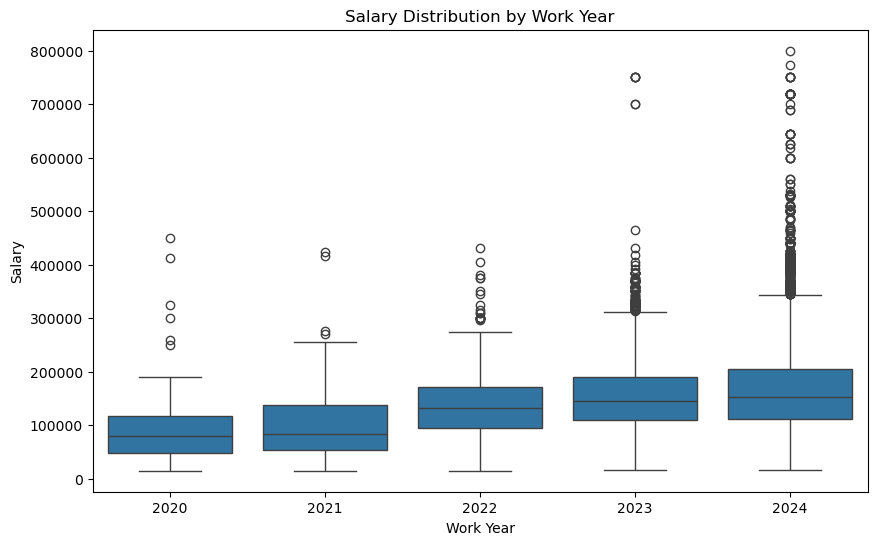

In [119]:
# Salary by Work Year
plt.figure(figsize=(10,6))
sns.boxplot(x='work_year', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Salary')
plt.show()


In [120]:
# Remote Ratio analysis Remote Ratio consists of 3 values :

#0 : No remote work (less than 20%)

#50 : Partially remote

#100 : Fully remote (more than 80%)

remote_type = ['Fully Remote', 'Partially Remote', 'No Remote Work']

fig = px.bar(x = remote_type, y = df['remote_ratio'].value_counts().values,
       color = remote_type, text = df['remote_ratio'].value_counts().values,
       title = 'Remote Ratio Distribution')

fig.update_layout( xaxis_title = "Remote Type", yaxis_title = "count")
fig.show()


In [121]:
# Remote Ratio by Work Year

# Calculate the average remote work ratio by work year
remote_ratio_by_year = df.groupby('work_year')['remote_ratio'].mean().reset_index()

# Rename columns for clarity
remote_ratio_by_year.columns = ['Work Year', 'Average Remote Ratio']

print(remote_ratio_by_year)

# Create a line chart
fig = px.line(
    remote_ratio_by_year,
    x='Work Year',
    y='Average Remote Ratio',
    markers=True,
    title='Average Remote Work Ratio by Work Year',
    labels={'Work Year': 'Work Year', 'Average Remote Ratio': 'Average Remote Ratio (%)'}
)

# Update layout to format y-axis as percentage and adjust size
fig.update_layout(
    xaxis_title='Work Year',
    yaxis_title='Average Remote Ratio (%)',
    yaxis_tickformat='.0%',  # Format y-axis as percentage
    width=800,
    height=600
)

# Show the chart
fig.show()


   Work Year  Average Remote Ratio
0       2020             62.000000
1       2021             69.954128
2       2022             55.367913
3       2023             31.805914
4       2024             17.973917


In [122]:
#Univariate Analysis¶
#Dealing with Categorical features
#Experience Level
#There's four categorical values in column 'Experience Level', each are:

#EN, which refers to Entry-level / Junior.

#MI, which refers to Mid-level / Intermediate.

#SE, which refers to Senior-level / Expert.

#EX, which refers to Executive-level / Director.

In [123]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

ex_level = df['experience_level'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Experience Level')
fig.show()

In [124]:
# Job Designation¶
print('Different job designations altogether :', len(set(df['job_title'])))

Different job designations altogether : 215


In [125]:
# most frequent job designations.
top15_job_titles = df['job_title'].value_counts()[:15]
fig = px.bar(y = top15_job_titles.values, x = top15_job_titles.index, 
            text = top15_job_titles.values, title = 'Top 15 Job Designations')
fig.update_layout(xaxis_title = "Job Designations", yaxis_title = "Count")
fig.show()

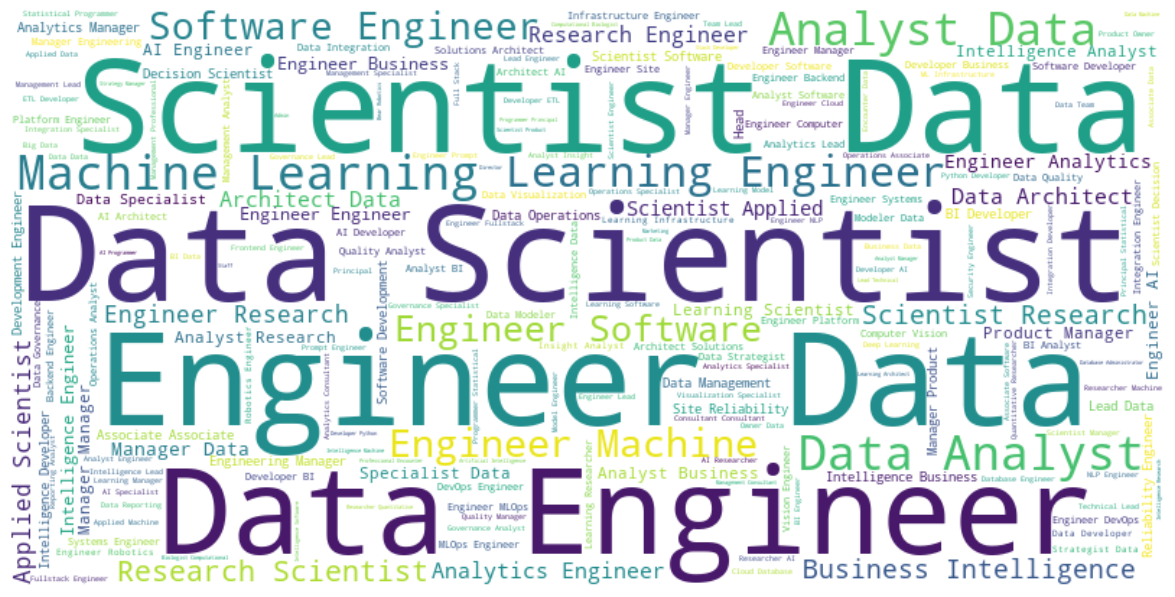

In [126]:
# Wordcloud of the Job Designations :


# Combine all job titles into a single string
text = ' '.join(df['job_title'].dropna())

# Define stopwords
stopwords = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Display the word cloud
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [127]:
df.to_csv('./data/salaries_cleaned.csv', index=False)


In [128]:
# Employment Type¶
#There are 4 employment types here :

#PT : Part-time

#FT : Full-time

#CT : Contract

#FL : Freelance

# Map employment type codes to full descriptions
emp_type_map = {'FT': 'Full-Time', 'PT': 'Part-Time', 'CT': 'Contract', 'FL': 'Freelance'}
df['employment_type_full'] = df['employment_type'].map(emp_type_map)

# Get value counts for the full descriptions
group = df['employment_type_full'].value_counts()

# Plot the distribution using Plotly
fig = px.bar(
    x=group.index, 
    y=group.values, 
    color=group.index, 
    text=group.values, 
    title='Employment Type Distribution'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title="Employment Type", 
    yaxis_title="Count", 
    showlegend=True
)

fig.show()


In [129]:
# Relation between Employee Residence and Company Location
country = coco.convert(names = df['employee_residence'], to = "ISO3")
df['employee_residence'] = country

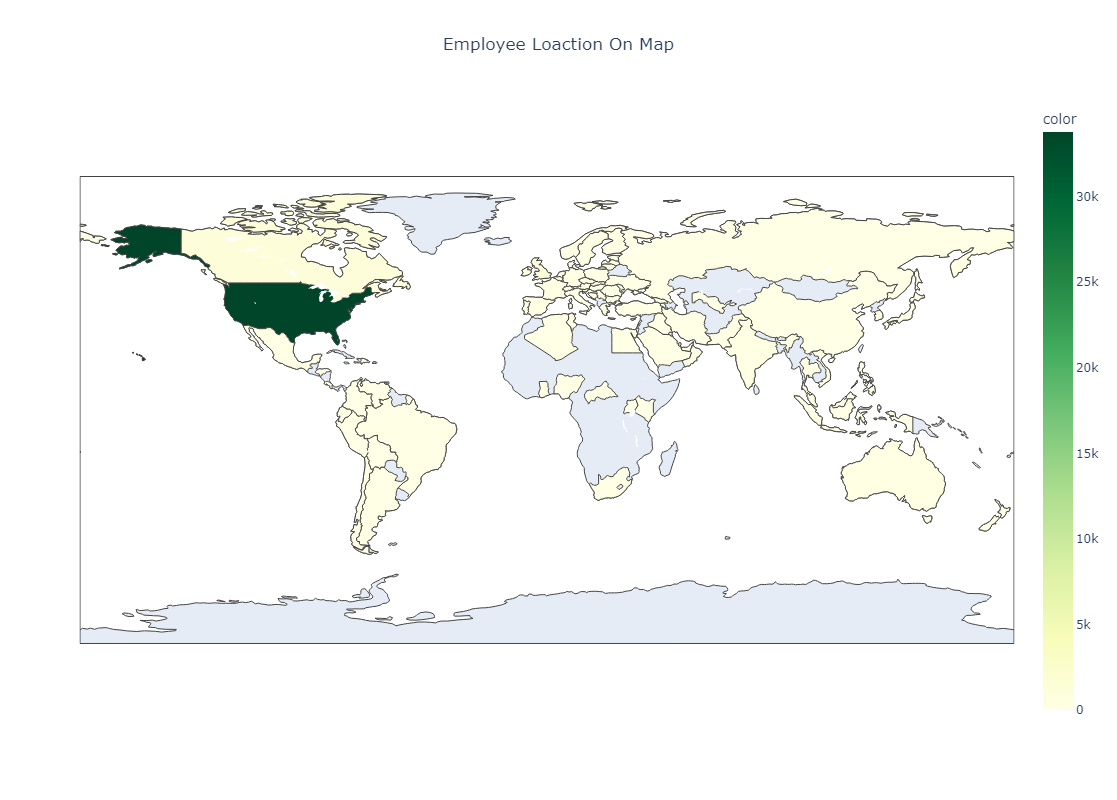

In [130]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Employee Loaction On Map')

# Update layout to increase the size of the plot
fig.update_layout(
    width=1000,  # Adjust width as needed
    height=800,  # Adjust height as needed
    title_x=0.5  # Center the title
)

fig.show()

In [131]:
top_15_emp_locations = residence[:15]
fig = px.bar(y = top_15_emp_locations.values, x = top_15_emp_locations.index, 
            color = top_15_emp_locations.index, text = top_15_emp_locations.values,
            title = 'Top 15 Locations of Employees')

fig.update_layout( xaxis_title = "Location of Employees", yaxis_title = "count")
fig.show()

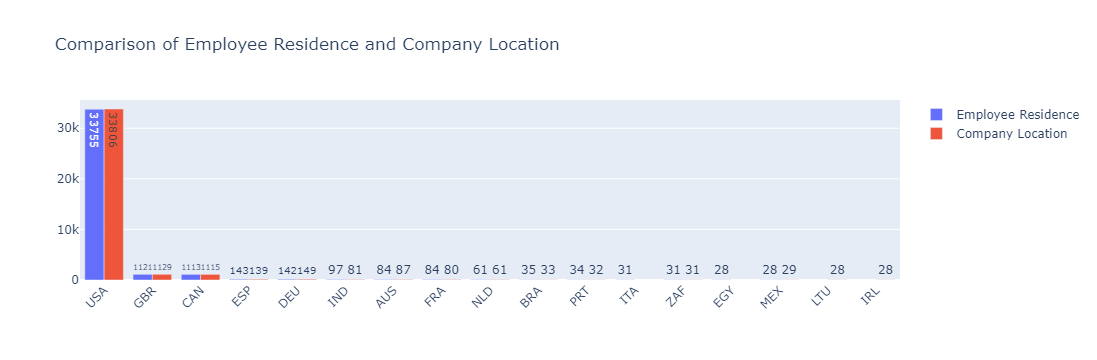

In [132]:
country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = country
company_location = df['company_location'].value_counts()
top_15_company_location = company_location[:15]

fig = go.Figure(data = [
    go.Bar(name = 'Employee Residence', 
           x = top_15_emp_locations.index, y = top_15_emp_locations.values,
           text = top_15_emp_locations.values),
    go.Bar(name = 'Company Location', x = top_15_company_location.index, 
           y = top_15_company_location.values, text = top_15_company_location.values)])

fig.update_layout(barmode = 'group', xaxis_tickangle = -45,
                  title='Comparison of Employee Residence and Company Location')

fig.show()

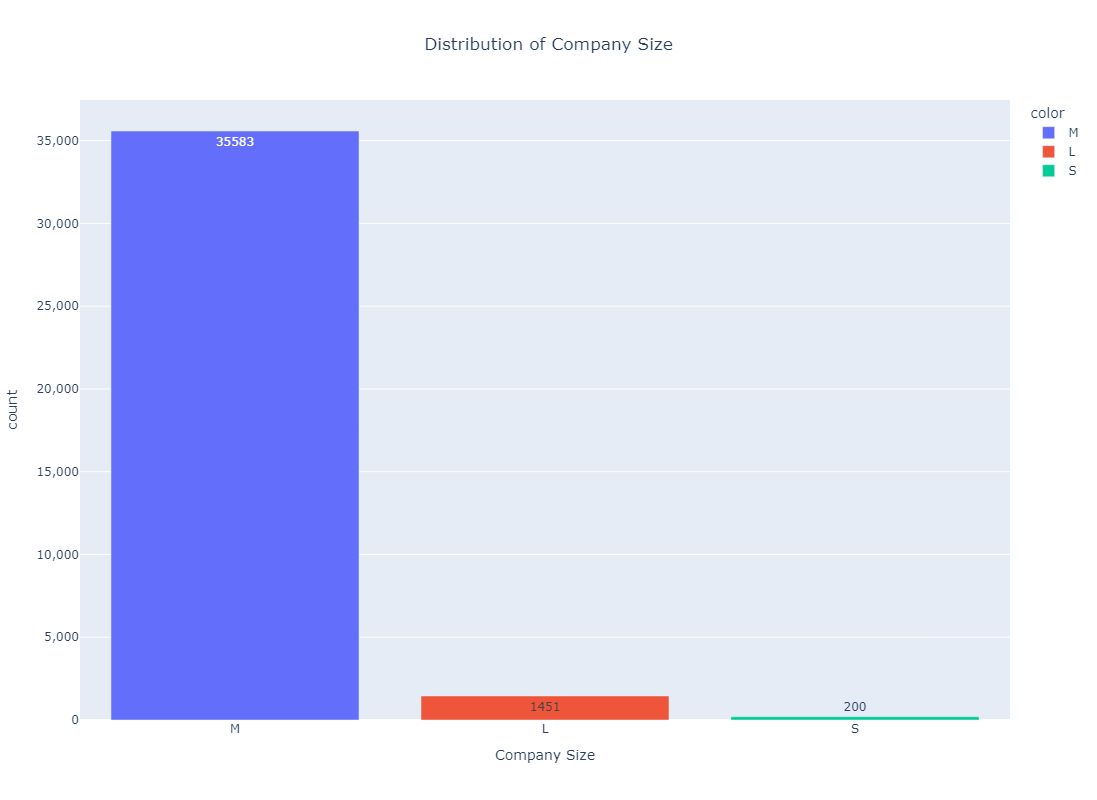

In [133]:
# Company size

group = df['company_size'].value_counts()

fig = px.bar(y = group.values, x = group.index, 
             color = group.index, text = group.values,
             title = 'Distribution of Company Size')

fig.update_layout(
    width=1000,  # Adjust width as needed
    height=800,  # Adjust height as needed
    title_x=0.5,  # Center the title
    yaxis_title = "count",
    xaxis_title = "Company Size",
    yaxis=dict(
        tickformat=',',  # Use comma as thousands separator
    )
    
)
fig.show()

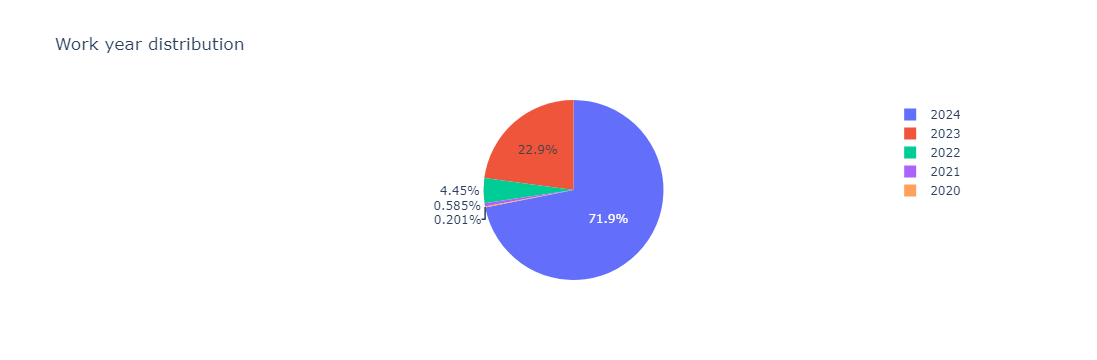

In [134]:
# Work Year Analysis

work_year = df['work_year'].value_counts()
fig = px.pie(values = work_year.values, names = work_year.index, 
            title = 'Work year distribution')
fig.show()

In [135]:
# Experience Level Analysis by Emploment type

# Aggregate data by employment type and experience level
employment_experience_counts = df.groupby(['employment_type', 'experience_level']).size().reset_index(name='count')

# Create a bar chart
fig = px.bar(
    employment_experience_counts,
    x='employment_type',
    y='count',
    color='experience_level',
    title='Experience Level Distribution by Employment Type',
    labels={'employment_type': 'Employment Type', 'count': 'Number of Employees'},
    text='count',
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Update layout to not stack bars
fig.update_layout(
    barmode='group',  # Display bars side by side
    xaxis_title='Employment Type',
    yaxis_title='Number of Employees',
    width=800,
    height=600
)

# Show the chart
fig.show()

In [136]:
# To 5 designation based on experience

# Aggregate data to find the top 5 job titles for each experience level based on count
top_job_titles = df.groupby(['experience_level', 'job_title']).size().reset_index(name='count')

# Find the top 5 job titles for each experience level
top_job_titles = top_job_titles.groupby('experience_level').apply(
    lambda x: x.nlargest(5, 'count')
).reset_index(drop=True)

# Create a bar chart with grouped bars
fig = px.bar(
    top_job_titles,
    x='job_title',
    y='count',
    color='experience_level',
    title='Top 5 Job Titles by Experience Level',
    labels={'job_title': 'Job Title', 'count': 'Number of Employees'},
    text='count',
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Update layout to display bars side by side
fig.update_layout(
    barmode='group',  # Display bars side by side
    xaxis_title='Job Title',
    yaxis_title='Number of Employees',
    width=800,
    height=600
)

# Show the chart
fig.show()

In [137]:
# Aggregate data to find the count of company sizes for each experience level
company_size_experience_counts = df.groupby(['experience_level', 'company_size']).size().reset_index(name='count')

# Create a bar chart with grouped bars
fig = px.bar(
    company_size_experience_counts,
    x='company_size',
    y='count',
    color='experience_level',
    title='Company Size Distribution by Experience Level',
    labels={'company_size': 'Company Size', 'count': 'Number of Employees'},
    text='count',
    color_discrete_sequence=px.colors.qualitative.Set1
)

# Update layout to display bars side by side
fig.update_layout(
    barmode='group',  # Display bars side by side
    xaxis_title='Company Size',
    yaxis_title='Number of Employees',
    width=800,
    height=600
)

# Show the chart
fig.show()

In [138]:
# Company Location Analysis
# Company Location based on Experience

# Convert company_location to ISO3 codes
df['company_location_iso3'] = coco.convert(names=df['company_location'], to='ISO3')

# Group by experience level and company location
exp_location = df.groupby(['experience_level', 'company_location_iso3']).size().unstack(fill_value=0)

# Define the experience levels
experience_levels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

# Plot choropleth maps for each experience level
figs = []

for level in experience_levels:
    location_counts = exp_location.loc[level].dropna()
    fig = px.choropleth(
        locations=location_counts.index,
        color=location_counts.values,
        title=f'{level} Company Location',
        color_continuous_scale=px.colors.sequential.Plasma
    )
    fig.add_scattergeo(
        locations=location_counts.index,
        text=location_counts.values,
        mode='text',
        textposition='top center'
    )
    figs.append(fig)

# Show each figure
for fig in figs:
    fig.update_layout(
        geo=dict(
            showland=True,
            landcolor='white',
            countrycolor='lightgrey'
        ),
        xaxis_title='Company Location',
        yaxis_title='Number of Employees',
        width=800,
        height=600
    )
    fig.show()

In [139]:
# Slary based on work year
# Calculate the average salary by work year
average_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Create a line plot for salary over work years
fig = px.line(
    average_salary_by_year,
    x='work_year',
    y='salary_in_usd',
    title='Average Salary by Work Year',
    labels={'work_year': 'Work Year', 'salary_in_usd': 'Average Salary (USD)'},
    markers=True
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Work Year',
    yaxis_title='Average Salary (USD)',
    width=800,
    height=600
)

# Show the chart
fig.show()

In [140]:
# Slary distribution per year
# Filter data for each year
work_2020 = df[df['work_year'] == 2020]
work_2021 = df[df['work_year'] == 2021]
work_2022 = df[df['work_year'] == 2022]
work_2023 = df[df['work_year'] == 2023]

# Histogram data
hist_data = [work_2020['salary_in_usd'], work_2021['salary_in_usd'], 
             work_2022['salary_in_usd'], work_2023['salary_in_usd']]
group_labels = ['2020 salary', '2021 salary', '2022 salary', '2023 salary']

# Create the histogram plot
fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig1.update_layout(title='Salary Distribution by Work Year')

# Calculate the mean salary for each year
mean_salaries = {
    '2020': work_2020['salary_in_usd'].mean().round(),
    '2021': work_2021['salary_in_usd'].mean().round(),
    '2022': work_2022['salary_in_usd'].mean().round(),
    '2023': work_2023['salary_in_usd'].mean().round()
}

# Create a DataFrame for bar chart
year_salary = pd.DataFrame(list(mean_salaries.items()), columns=['Work Year', 'Mean Salary (USD)'])

# Create the bar chart
fig2 = px.bar(
    year_salary,
    x='Work Year',
    y='Mean Salary (USD)',
    title='Mean Salary by Work Year',
    labels={'Work Year': 'Work Year', 'Mean Salary (USD)': 'Mean Salary (USD)'},
    color='Work Year',
    text='Mean Salary (USD)'
)

# Update bar chart layout
fig2.update_layout(
    xaxis_title='Work Year',
    yaxis_title='Mean Salary (USD)',
    width=800,
    height=600
)

# Show the plots
fig1.show()
fig2.show()

In [141]:
# Salary based on experience
# Filter salary data by experience level
exp_salary = df[['experience_level', 'salary_in_usd']]

entry_salary = exp_salary[exp_salary['experience_level'] == 'Entry-level/Junior']
mid_salary = exp_salary[exp_salary['experience_level'] == 'Mid-level/Intermediate']
senior_salary = exp_salary[exp_salary['experience_level'] == 'Senior-level/Expert']
executive_salary = exp_salary[exp_salary['experience_level'] == 'Executive-level/Director']

# Histogram data
hist_data = [entry_salary['salary_in_usd'], mid_salary['salary_in_usd'], 
             senior_salary['salary_in_usd'], executive_salary['salary_in_usd']]
group_labels = ['Entry-level/Junior', 'Mid-level/Intermediate', 'Senior-level/Expert', 'Executive-level/Director']

# Calculate mean salary for each experience level
means = [
    entry_salary['salary_in_usd'].mean(),
    mid_salary['salary_in_usd'].mean(),
    senior_salary['salary_in_usd'].mean(),
    executive_salary['salary_in_usd'].mean()
]

# Create the distribution plot
fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig1.update_layout(title='Salary Distribution by Experience Level')

# Create the bar chart
fig2 = go.Figure(data=px.bar(
    x=group_labels,
    y=means,
    labels={'x': 'Experience Level', 'y': 'Mean Salary (USD)'},
    title='Mean Salary by Experience Level'
).data)

fig2.update_layout(
    xaxis_title="Experience Level",
    yaxis_title="Mean Salary (USD)",
    width=800,
    height=600
)

# Show the plots
fig1.show()
fig2.show()

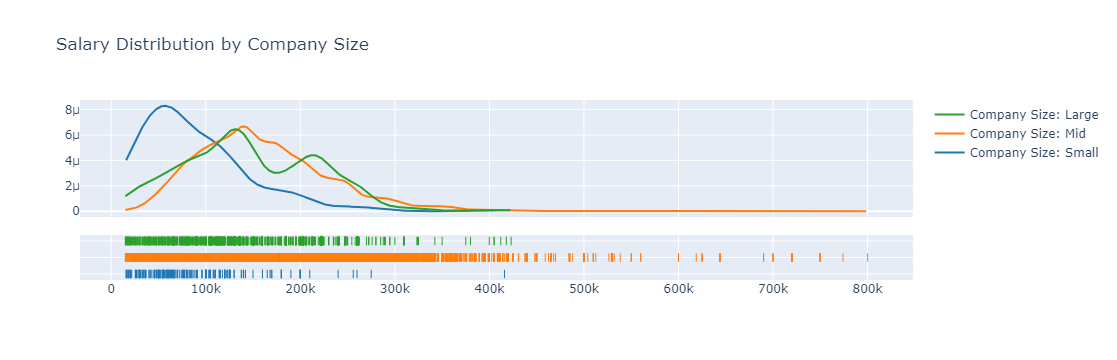

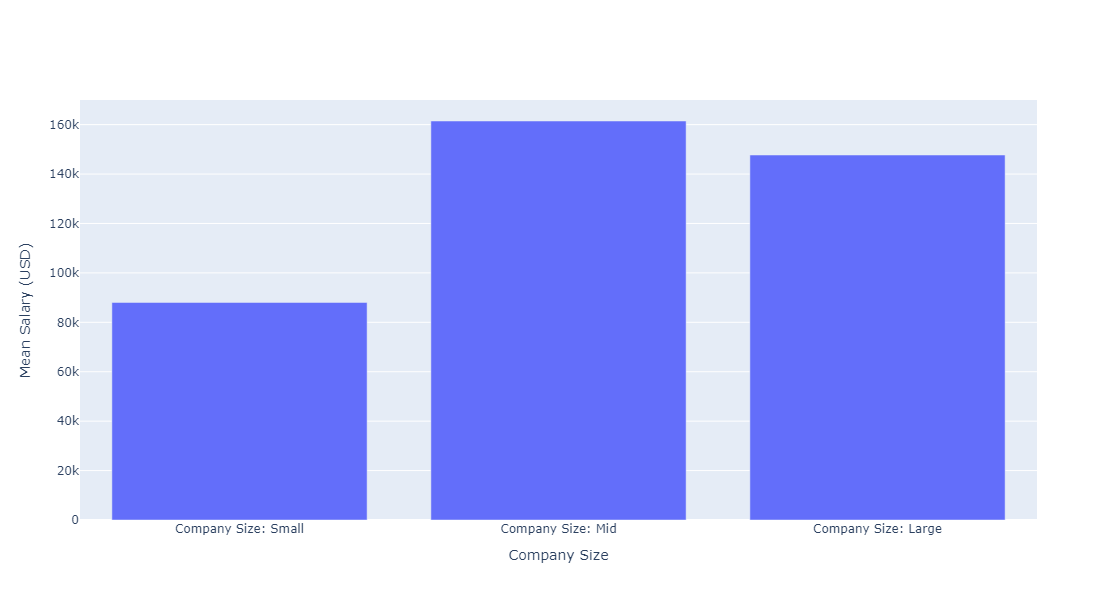

In [142]:
# Salary based on Company Size
# Filter salary data by company size
company_size = df[['company_size', 'salary_in_usd']]
small = company_size[company_size['company_size'] == 'S']
mid = company_size[company_size['company_size'] == 'M']
large = company_size[company_size['company_size'] == 'L']

# Histogram data
hist_data = [small['salary_in_usd'], mid['salary_in_usd'], large['salary_in_usd']]
group_labels = ['Company Size: Small', 'Company Size: Mid', 'Company Size: Large']

# Calculate mean salary for each company size
means = [
    small['salary_in_usd'].mean(),
    mid['salary_in_usd'].mean(),
    large['salary_in_usd'].mean()
]

# Create the distribution plot
fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig1.update_layout(title='Salary Distribution by Company Size')

# Create the bar chart
fig2 = go.Figure(data=px.bar(
    x=group_labels,
    y=means,
    labels={'x': 'Company Size', 'y': 'Mean Salary (USD)'},
    title='Mean Salary by Company Size'
).data)

fig2.update_layout(
    xaxis_title="Company Size",
    yaxis_title="Mean Salary (USD)",
    width=800,
    height=600
)

# Show the plots
fig1.show()
fig2.show()

In [143]:
# Top25 highest salaries based on designation

# Sort DataFrame by salary in descending order
sorted_df = df.sort_values(by='salary_in_usd', ascending=False)

# Select the top 25 highest salaries
top_25_salaries = sorted_df.head(25)

# Create a bar chart for the top 25 salaries based on designation
fig = px.bar(
    top_25_salaries,
    x='salary_in_usd',
    y='job_title',
    title='Top 25 Highest Salaries by Designation',
    labels={'salary_in_usd': 'Salary (USD)', 'job_title': 'Job Title'},
    text='salary_in_usd'
)

# Update layout for better appearance
fig.update_layout(
    xaxis_title='Salary (USD)',
    yaxis_title='Job Title',
    xaxis_tickformat='$,.0f',  # Format x-axis to show currency
    width=800,
    height=600
)

# Show the chart
fig.show()

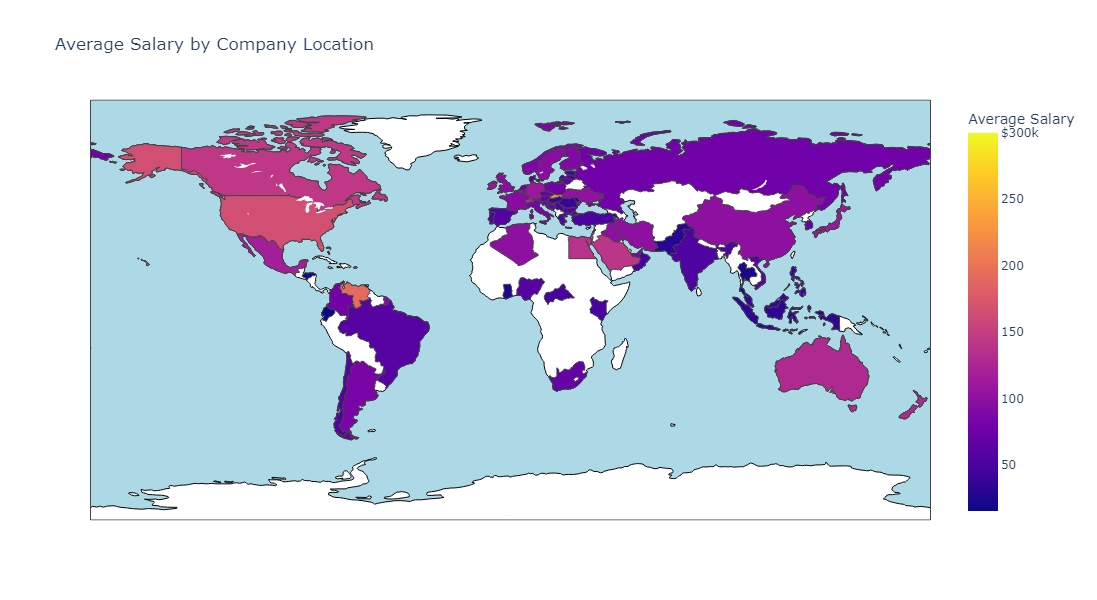

In [144]:
# Average Salary based on Company Location

# Calculate the average salary for each company location
avg_salary_by_location = df.groupby('company_location')['salary_in_usd'].mean().reset_index()

# Create a choropleth map for average salary by company location
fig = px.choropleth(
    avg_salary_by_location,
    locations='company_location',
    locationmode='ISO-3',  # Use ISO-3 codes for locations
    color='salary_in_usd',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Average Salary by Company Location',
    labels={'salary_in_usd': 'Average Salary (USD)'}
)

# Update layout for better appearance
fig.update_layout(
    geo=dict(
        showcoastlines=True,
        coastlinecolor="Black",
        showland=True,
        landcolor="white",
        showocean=True,
        oceancolor="LightBlue"
    ),
    coloraxis_colorbar=dict(
        title="Average Salary",
        tickprefix="$",
        showticksuffix="last"
    ),
    width=800,
    height=600
)

# Show the map
fig.show()

In [145]:
# Filter out non-numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlation'),
    zmin=-1,  # Set min value for color scale
    zmax=1,   # Set max value for color scale
))

# Add annotations
fig.update_traces(
    text=corr_matrix.applymap(lambda x: f"{x:.2f}").values,
    texttemplate="%{text}",
    textfont=dict(size=12, color='black')
)

# Update layout for better appearance
fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=0),
    width=800,
    height=800
)

# Show the heatmap
fig.show()

In [146]:
df.dtypes

work_year                 int64
experience_level         object
employment_type          object
job_title                object
salary_in_usd             int64
employee_residence       object
remote_ratio              int64
company_location         object
company_size             object
employment_type_full     object
company_location_iso3    object
dtype: object

# Create tables for PostgreSQL DB

In [147]:
df.head()

work_year          experience_level employment_type             job_title  \
0       2020        Entry-level/Junior              FT   Azure Data Engineer   
1       2020        Entry-level/Junior              CT    Staff Data Analyst   
2       2020       Senior-level/Expert              FT  Staff Data Scientist   
3       2020        Entry-level/Junior              FT          Data Analyst   
4       2020  Executive-level/Director              FT        Data Scientist   

   salary_in_usd employee_residence  remote_ratio company_location  \
0         100000                MUS             0              MUS   
1          44753                CAN            50              CAN   
2         164000                USA            50              USA   
3          47899                DEU             0              DEU   
4         300000                USA           100              USA   

  company_size employment_type_full company_location_iso3  
0            S            Full-Time                   MUS  
1            L             Contract                   CAN  
2            M            Full-Time                   USA  
3            L            Full-Time                   DEU  
4            L            Full-Time                   USA

In [148]:
# Create job_title table

job_title = df['job_title'].unique()
title_id = np.arange(1,len(job_title)+1)

title_df = pd.DataFrame({
    'title_id': title_id,
    'job_title': job_title
})

title_df.head()

title_id             job_title
0         1   Azure Data Engineer
1         2    Staff Data Analyst
2         3  Staff Data Scientist
3         4          Data Analyst
4         5        Data Scientist

In [156]:
# Create job_id
job_id_array = np.arange(1, len(df) + 1)
job_id = ['job_' + str(id) for id in job_id_array]

# Create the salary DataFrame
salary_df = pd.DataFrame({
    'job_id': job_id,
    'salary_in_usd': df['salary_in_usd'],
    })

# Display the first few rows of the salary table
salary_df.head()

job_id  salary_in_usd
0  job_1         100000
1  job_2          44753
2  job_3         164000
3  job_4          47899
4  job_5         300000

In [164]:
# Create location table
location = df['company_location'].unique()
loc_id = np.arange(1, len(location) + 1)

# Convert country codes to full names using country_converter
location_names = coco.convert(names=location, to='name_short')

# Create a DataFrame with location_id and full country names
location_df = pd.DataFrame({
    'location_id': loc_id,
    'company_location': location_names  # Full country names (renamed as company_location)
})

# Display the updated DataFrame
location_df.head()

location_id company_location
0            1        Mauritius
1            2           Canada
2            3    United States
3            4          Germany
4            5          Nigeria

In [178]:
import pandas as pd
import numpy as np
import country_converter as coco

# Display columns in df
print("df columns:", df.columns)

# Create location table
location = df['location_name'].unique()  # Use 'location_name' from df
loc_id = np.arange(1, len(location) + 1)

# Convert location codes to full names using country_converter
location_names = coco.convert(names=location, to='name_short')

# Create a DataFrame with location_id and full location names
location_df = pd.DataFrame({
    'location_id': loc_id,
    'company_location': location_names  # Full location names
})

# Display columns in location_df
print("location_df columns:", location_df.columns)

# Ensure df['location_name'] is in the same format as location_df['company_location']
# Convert location codes to full names in df
df['location_name_full'] = coco.convert(names=df['location_name'], to='name_short')

# Display the first few rows to verify the conversion
print("df after location conversion:\n", df[['location_name', 'location_name_full']].head())

# Merge df with location_df to get location_id
df = df.merge(location_df, left_on='location_name_full', right_on='company_location', how='left', suffixes=('', '_location'))

# Drop redundant columns if necessary
df.drop(columns=['location_name_full', 'company_location'], inplace=True)

# Create job_id
job_id_array = np.arange(1, len(df) + 1)
job_id = ['job_' + str(id) for id in job_id_array]
df['job_id'] = job_id

# Create job DataFrame
job_df = df[['job_id', 'work_year', 'employee_residence', 'experience_level', 'employment_type', 
             'employment_type_full', 'company_size', 'title_id', 'location_id']]

# Display the first few rows of the job table
print("job_df head:\n")
job_df.head()


df columns: Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio', 'location_name',
       'company_size', 'employment_type_full', 'company_location_iso3',
       'title_id', 'location_id_x', 'job_id', 'location_id_y',
       'company_location_x', 'location_id', 'company_location_y',
       'location_id_location'],
      dtype='object')
location_df columns: Index(['location_id', 'company_location'], dtype='object')
df after location conversion:
   location_name location_name_full
0           MUS          Mauritius
1           CAN             Canada
2           USA      United States
3           DEU            Germany
4           USA      United States
job_df head:



job_id  work_year employee_residence          experience_level  \
0  job_1       2020                MUS        Entry-level/Junior   
1  job_2       2020                CAN        Entry-level/Junior   
2  job_3       2020                USA       Senior-level/Expert   
3  job_4       2020                DEU        Entry-level/Junior   
4  job_5       2020                USA  Executive-level/Director   

  employment_type employment_type_full company_size  title_id  location_id  
0              FT            Full-Time            S         1            1  
1              CT             Contract            L         2            2  
2              FT            Full-Time            M         3            3  
3              FT            Full-Time            L         4            4  
4              FT            Full-Time            L         5            3

In [181]:
# Save tables
title_df.to_csv("job_title.csv", index=False)
location_df.to_csv("location.csv", index=False)
salary_df.to_csv("salary.csv", index=False)
job_df.to_csv("job.csv", index=False)

print("Tables saved successfully.")

Tables saved successfully.


In [182]:
pwd


'C:\\Users\\anyas\\OneDrive\\Desktop\\Boot_Camp\\GitLab\\UBHM-VIRT-DATA-PT-10-2023-U-LOLC\\15-Mapping\\JobProject\\data_jobs'